In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#look at 2012 and 2017 fire data, plus the combo data file
sc2012 = pd.read_csv(r'C:\Users\efann\Desktop\Wildfire\SonomaCountyWildfire2012.csv')
sc2017 = pd.read_csv(r'C:\Users\efann\Desktop\Wildfire\SonomaCountyWildfire2017.csv')
sccombo = pd.read_csv(r'C:\Users\efann\Desktop\Wildfire\SonomaCountyWildfireCombo.csv')

In [3]:
#look at columns and data type for the combo file
sccombo.dtypes

OID_                               int64
FOD_ID                             int64
FPA_ID                            object
SOURCE_SYSTEM_TYPE                object
SOURCE_SYSTEM                     object
NWCG_REPORTING_AGENCY             object
NWCG_REPORTING_UNIT_ID            object
NWCG_REPORTING_UNIT_NAME          object
SOURCE_REPORTING_UNIT             object
SOURCE_REPORTING_UNIT_NAME        object
LOCAL_FIRE_REPORT_ID             float64
LOCAL_INCIDENT_ID                 object
FIRE_CODE                         object
FIRE_NAME                         object
ICS_209_PLUS_INCIDENT_JOIN_ID     object
ICS_209_PLUS_COMPLEX_JOIN_ID      object
MTBS_ID                           object
MTBS_FIRE_NAME                    object
COMPLEX_NAME                      object
FIRE_YEAR                          int64
DISCOVERY_DATE                    object
DISCOVERY_DOY                      int64
DISCOVERY_TIME                     int64
NWCG_CAUSE_CLASSIFICATION         object
NWCG_GENERAL_CAU

<AxesSubplot:xlabel='FIRE_SIZE', ylabel='count'>

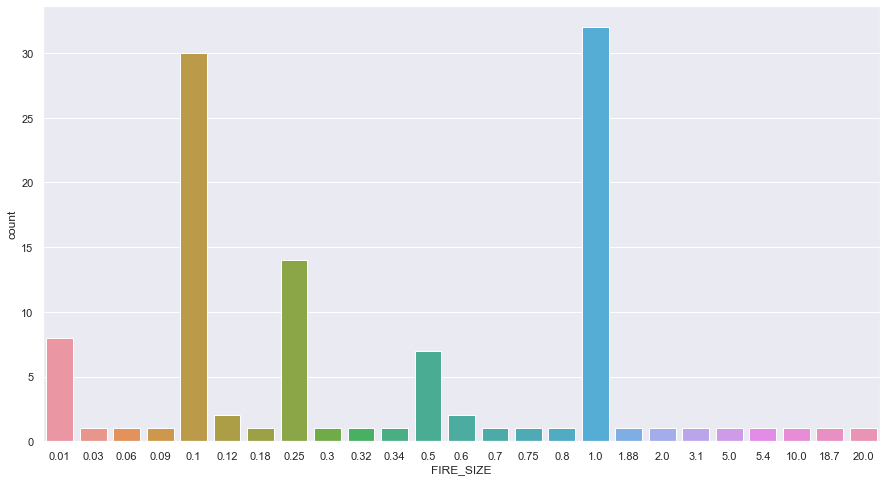

In [4]:
#bar graph looking at counts of fires in Sonoma County in 2012, most under 1 acre, and the larget was 20 acres
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="FIRE_SIZE", data=sc2012)

<AxesSubplot:xlabel='FIRE_SIZE', ylabel='count'>

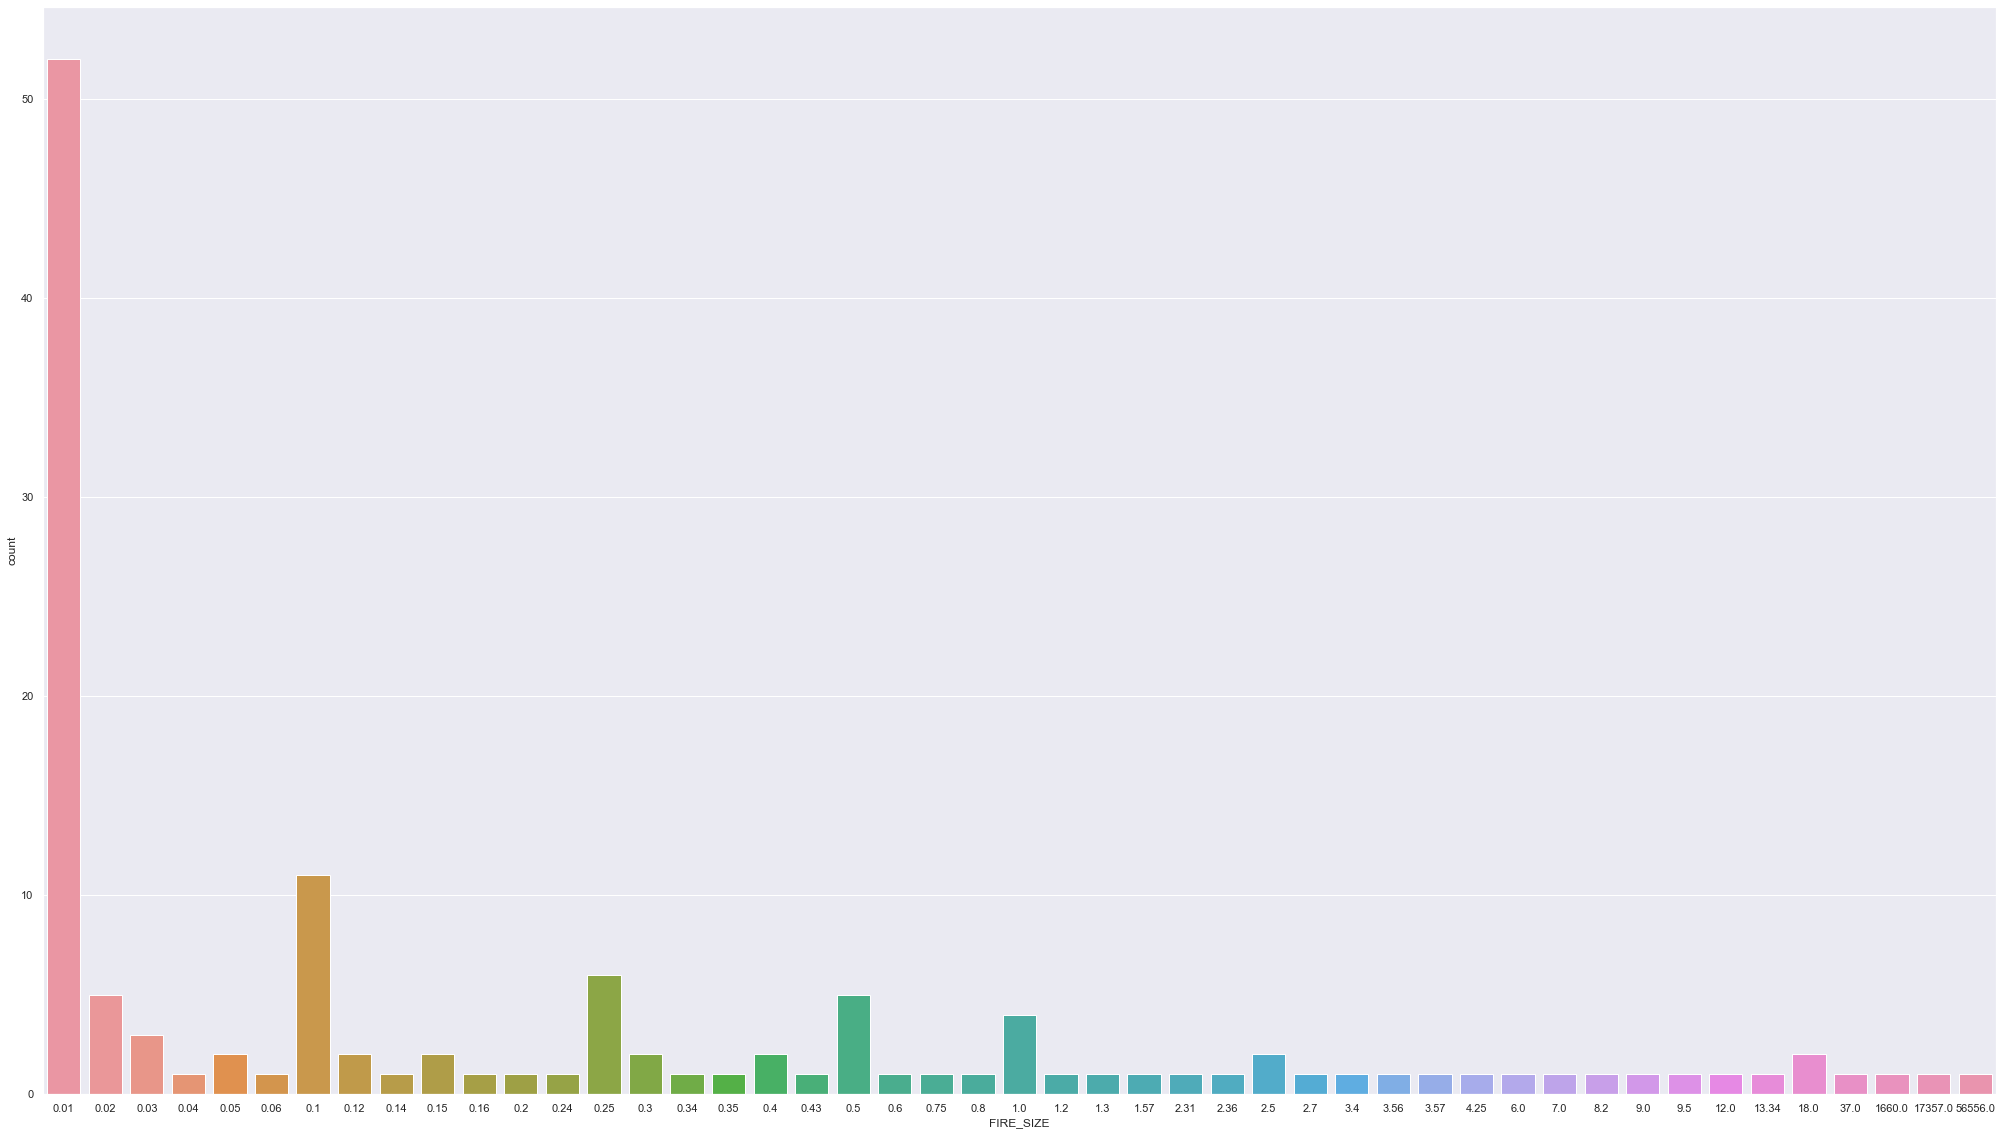

In [5]:
#looking at counts of fires in Sonoma county in 2017, there were more wildfires and while most were still small, there were more very large fires this year.
sns.set(rc = {'figure.figsize':(35,20)})
sns.countplot(x="FIRE_SIZE", data=sc2017)

Text(0, 0.5, '# of Wildfires')

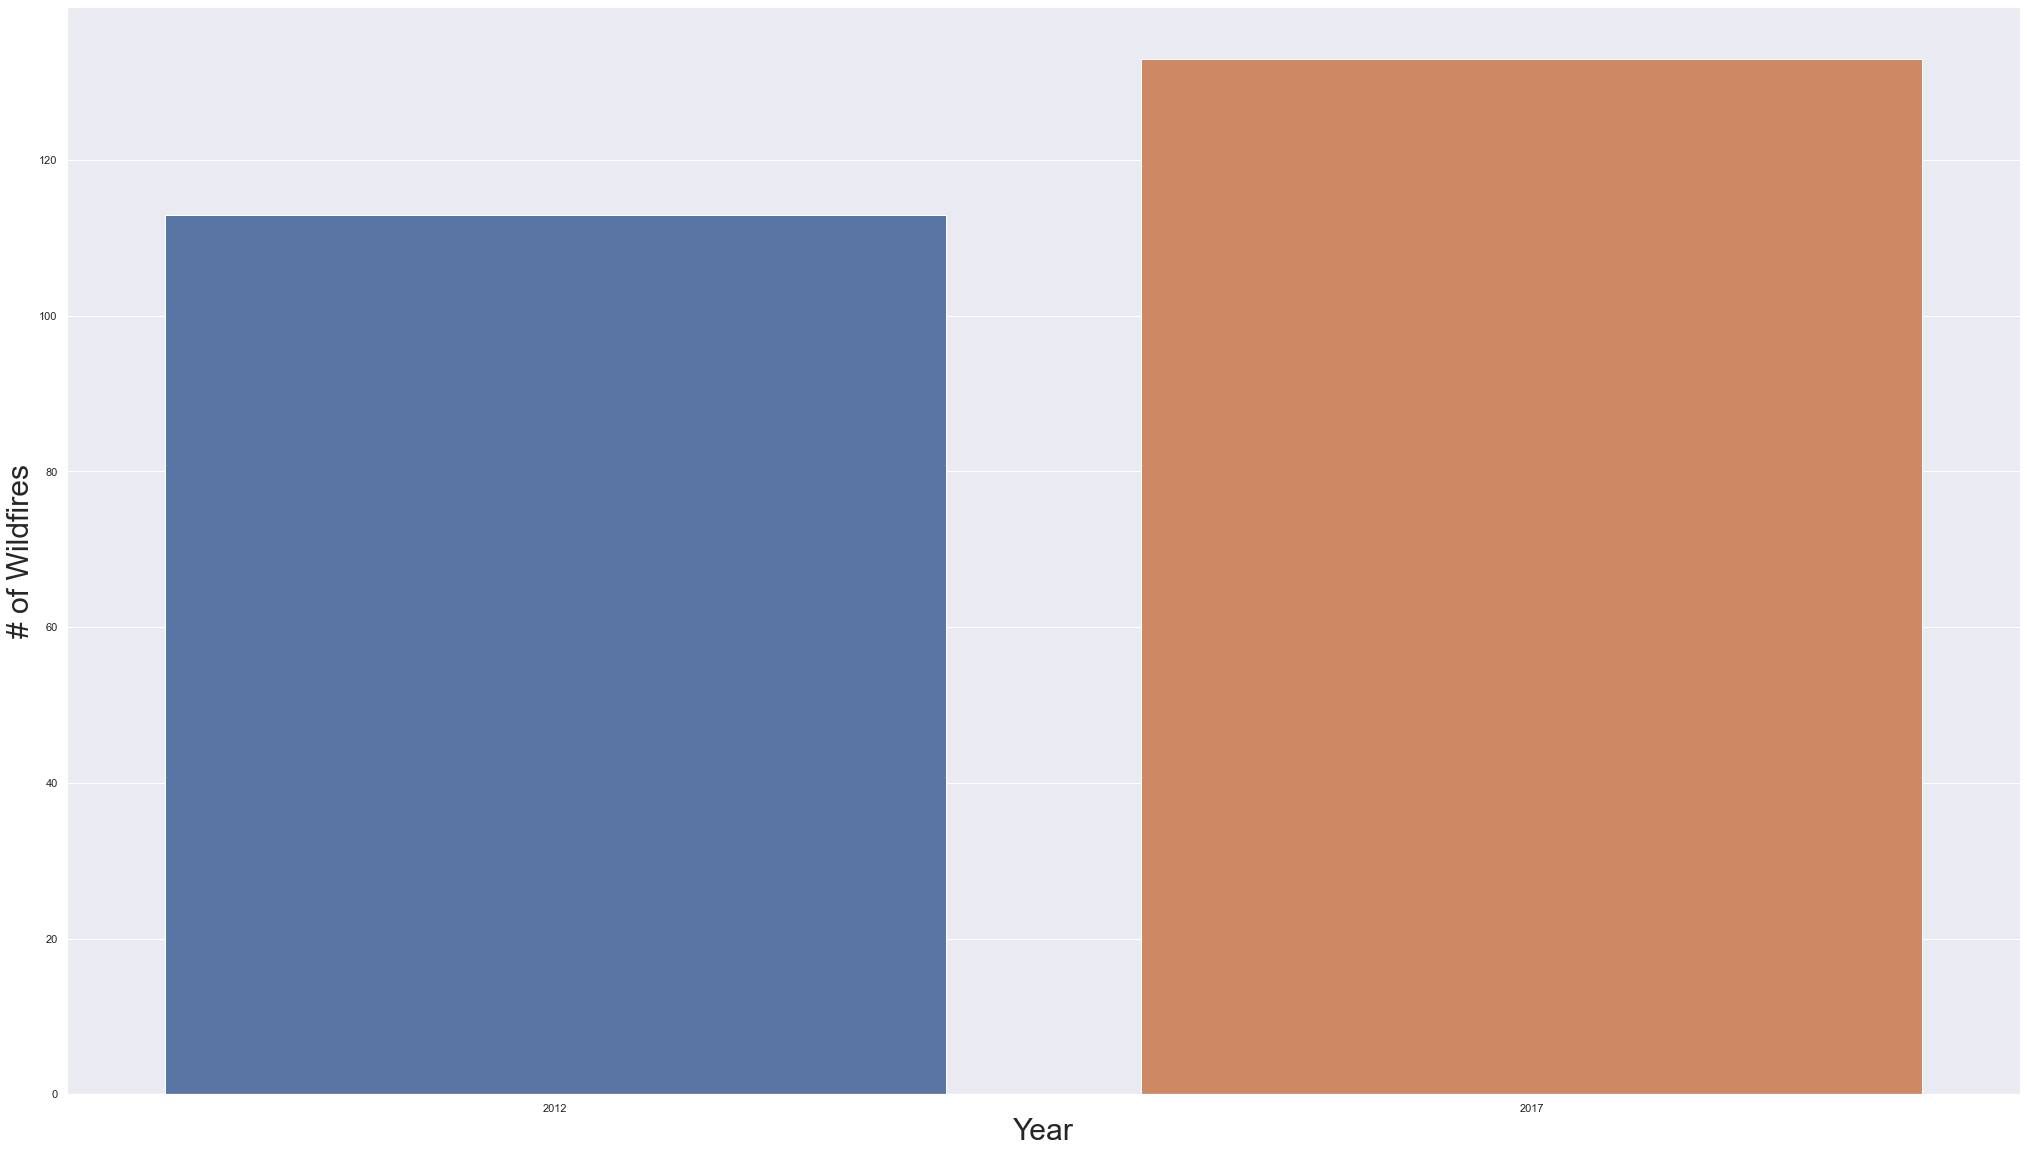

In [6]:
#bar chart to compare counts of wildfires by year regardless of fire size
p= sns.countplot(x="FIRE_YEAR", data=sccombo)
p.set_xlabel("Year", fontsize = 30)
p.set_ylabel("# of Wildfires", fontsize = 30)

In [7]:
#looking at census data csv for 1860-2010 Sonoma County, data from http://www.bayareacensus.ca.gov/counties/SonomaCounty.htm
# 2020 census data for Sonoma County from https://www.census.gov/quickfacts/sonomacountycalifornia
#pull data from the cvs file and website into a dataframe
df1 = df = pd.DataFrame({"Year":[1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
                         "Population":[11867, 19819, 25926, 32721, 38480, 48394, 52090, 62222, 69052, 103405, 147375, 204885, 299681, 388222, 458614, 483878, 488863]})
print(df1, "\n")

    Year  Population
0   1860       11867
1   1870       19819
2   1880       25926
3   1890       32721
4   1900       38480
5   1910       48394
6   1920       52090
7   1930       62222
8   1940       69052
9   1950      103405
10  1960      147375
11  1970      204885
12  1980      299681
13  1990      388222
14  2000      458614
15  2010      483878
16  2020      488863 



Text(0.5, 1.0, 'Sonoma County Population Census Data (1860 - 2020)')

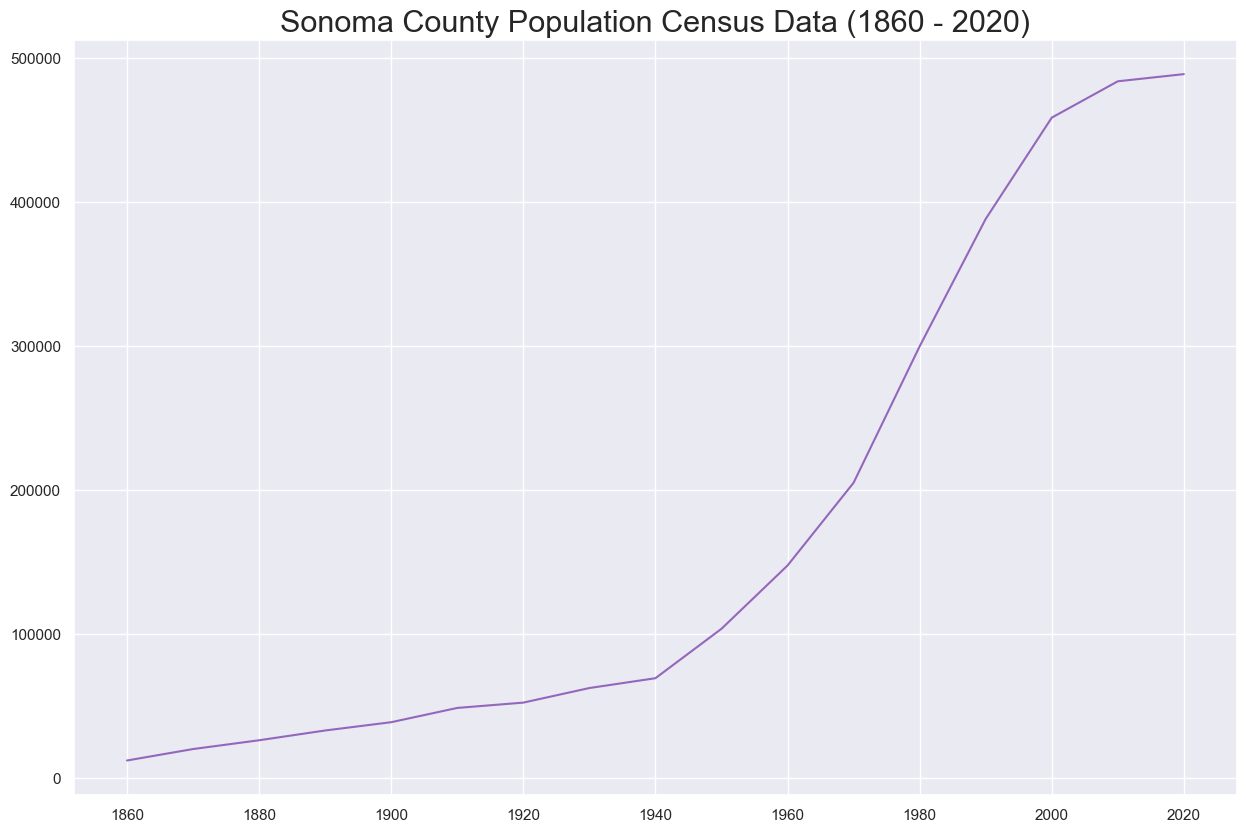

In [8]:
#Census data shows a large influx of people to Sonoma County starting in 1940 and increasing dramatically again in the mid 1970s.  The most recent years still have growth but its not as exponential as the time periods mentioned before.

# Draw Plot
plt.figure(figsize=(15,10), dpi= 100)
plt.plot('Year', 'Population', data=df1, color='tab:purple')
plt.title("Sonoma County Population Census Data (1860 - 2020)", fontsize=22)

In [9]:
#Look at historic average temps, data from weather.gov
temp = pd.read_csv(r'C:\Users\efann\SonomaCountyHistoricAvTemp.csv')
temp.head(5)

,YEAR,January,February,March,April,May,June,July,August,September,October,November,December,Annual
0,1980,M,M,M,M,M,M,M,M,M,M,M,M,M
1,1981,M,M,M,M,M,M,M,M,M,M,M,M,M
2,1982,M,M,M,M,M,M,M,M,M,M,M,M,M
3,1983,M,M,M,M,M,M,M,M,M,M,M,M,M
4,1984,M,M,M,M,M,M,M,M,M,M,M,M,M


In [10]:
#check for data types
temp.dtypes

YEAR          int64
January      object
February     object
March        object
April        object
May          object
June         object
July         object
August       object
September    object
October      object
November     object
December     object
Annual       object
dtype: object

In [11]:
#pull the years between 2012 and 2017
temp_some_rows = temp[32:38]
display(temp_some_rows)

,YEAR,January,February,March,April,May,June,July,August,September,October,November,December,Annual
32,2012,47.7,51.1,50.8,56.7,62.1,65.2,66.9,66.9,64.1,62.1,54.3,47.2,57.9
33,2013,44.9,49.5,53.5,60,63.3,66.8,66.6,67.7,66,59.3,54.2,44.5,58
34,2014,49.9,51.8,56.1,58.3,64,66.4,68.5,67.8,67.2,64.5,55.7,52.8,60.3
35,2015,50.3,54.9,57.7,57.8,59.8,67,69.1,70,68.8,66.2,51.5,47.3,60
36,2016,50,54.9,55,59.3,61.7,67,67.7,66.1,66.7,60.3,54.6,45.8,59.1
37,2017,46.5,51.3,54.9,56.5,61.9,67.7,69.4,69,69.7,62.2,53.6,46.6,59.1


In [12]:
#check types, still object for items of interest
temp_some_rows.dtypes

YEAR          int64
January      object
February     object
March        object
April        object
May          object
June         object
July         object
August       object
September    object
October      object
November     object
December     object
Annual       object
dtype: object

In [13]:
#one method to change objects to numeric (float64),
new_temp_some_rows = temp[32:38].copy()
new_temp_some_rows['January'] = pd.to_numeric(new_temp_some_rows['January'])
new_temp_some_rows['February'] = pd.to_numeric(new_temp_some_rows['February'])
new_temp_some_rows['March'] = pd.to_numeric(new_temp_some_rows['March'])
new_temp_some_rows['April'] = pd.to_numeric(new_temp_some_rows['April'])
new_temp_some_rows['May'] = pd.to_numeric(new_temp_some_rows['May'])
new_temp_some_rows['June'] = pd.to_numeric(new_temp_some_rows['June'])
new_temp_some_rows['July'] = pd.to_numeric(new_temp_some_rows['July'])
new_temp_some_rows['August'] = pd.to_numeric(new_temp_some_rows['August'])
new_temp_some_rows['September'] = pd.to_numeric(new_temp_some_rows['September'])
new_temp_some_rows['October'] = pd.to_numeric(new_temp_some_rows['October'])
new_temp_some_rows['November'] = pd.to_numeric(new_temp_some_rows['November'])
new_temp_some_rows['December'] = pd.to_numeric(new_temp_some_rows['December'])
new_temp_some_rows['Annual'] = pd.to_numeric(new_temp_some_rows['Annual'])

#check the new types for this snippet
new_temp_some_rows.dtypes

YEAR           int64
January      float64
February     float64
March        float64
April        float64
May          float64
June         float64
July         float64
August       float64
September    float64
October      float64
November     float64
December     float64
Annual       float64
dtype: object

In [14]:
#another way to pull these specific rows and put them in a dataframe
temp.loc[[32,33,34,35,36,37]]

,YEAR,January,February,March,April,May,June,July,August,September,October,November,December,Annual
32,2012,47.7,51.1,50.8,56.7,62.1,65.2,66.9,66.9,64.1,62.1,54.3,47.2,57.9
33,2013,44.9,49.5,53.5,60,63.3,66.8,66.6,67.7,66,59.3,54.2,44.5,58
34,2014,49.9,51.8,56.1,58.3,64,66.4,68.5,67.8,67.2,64.5,55.7,52.8,60.3
35,2015,50.3,54.9,57.7,57.8,59.8,67,69.1,70,68.8,66.2,51.5,47.3,60
36,2016,50,54.9,55,59.3,61.7,67,67.7,66.1,66.7,60.3,54.6,45.8,59.1
37,2017,46.5,51.3,54.9,56.5,61.9,67.7,69.4,69,69.7,62.2,53.6,46.6,59.1


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

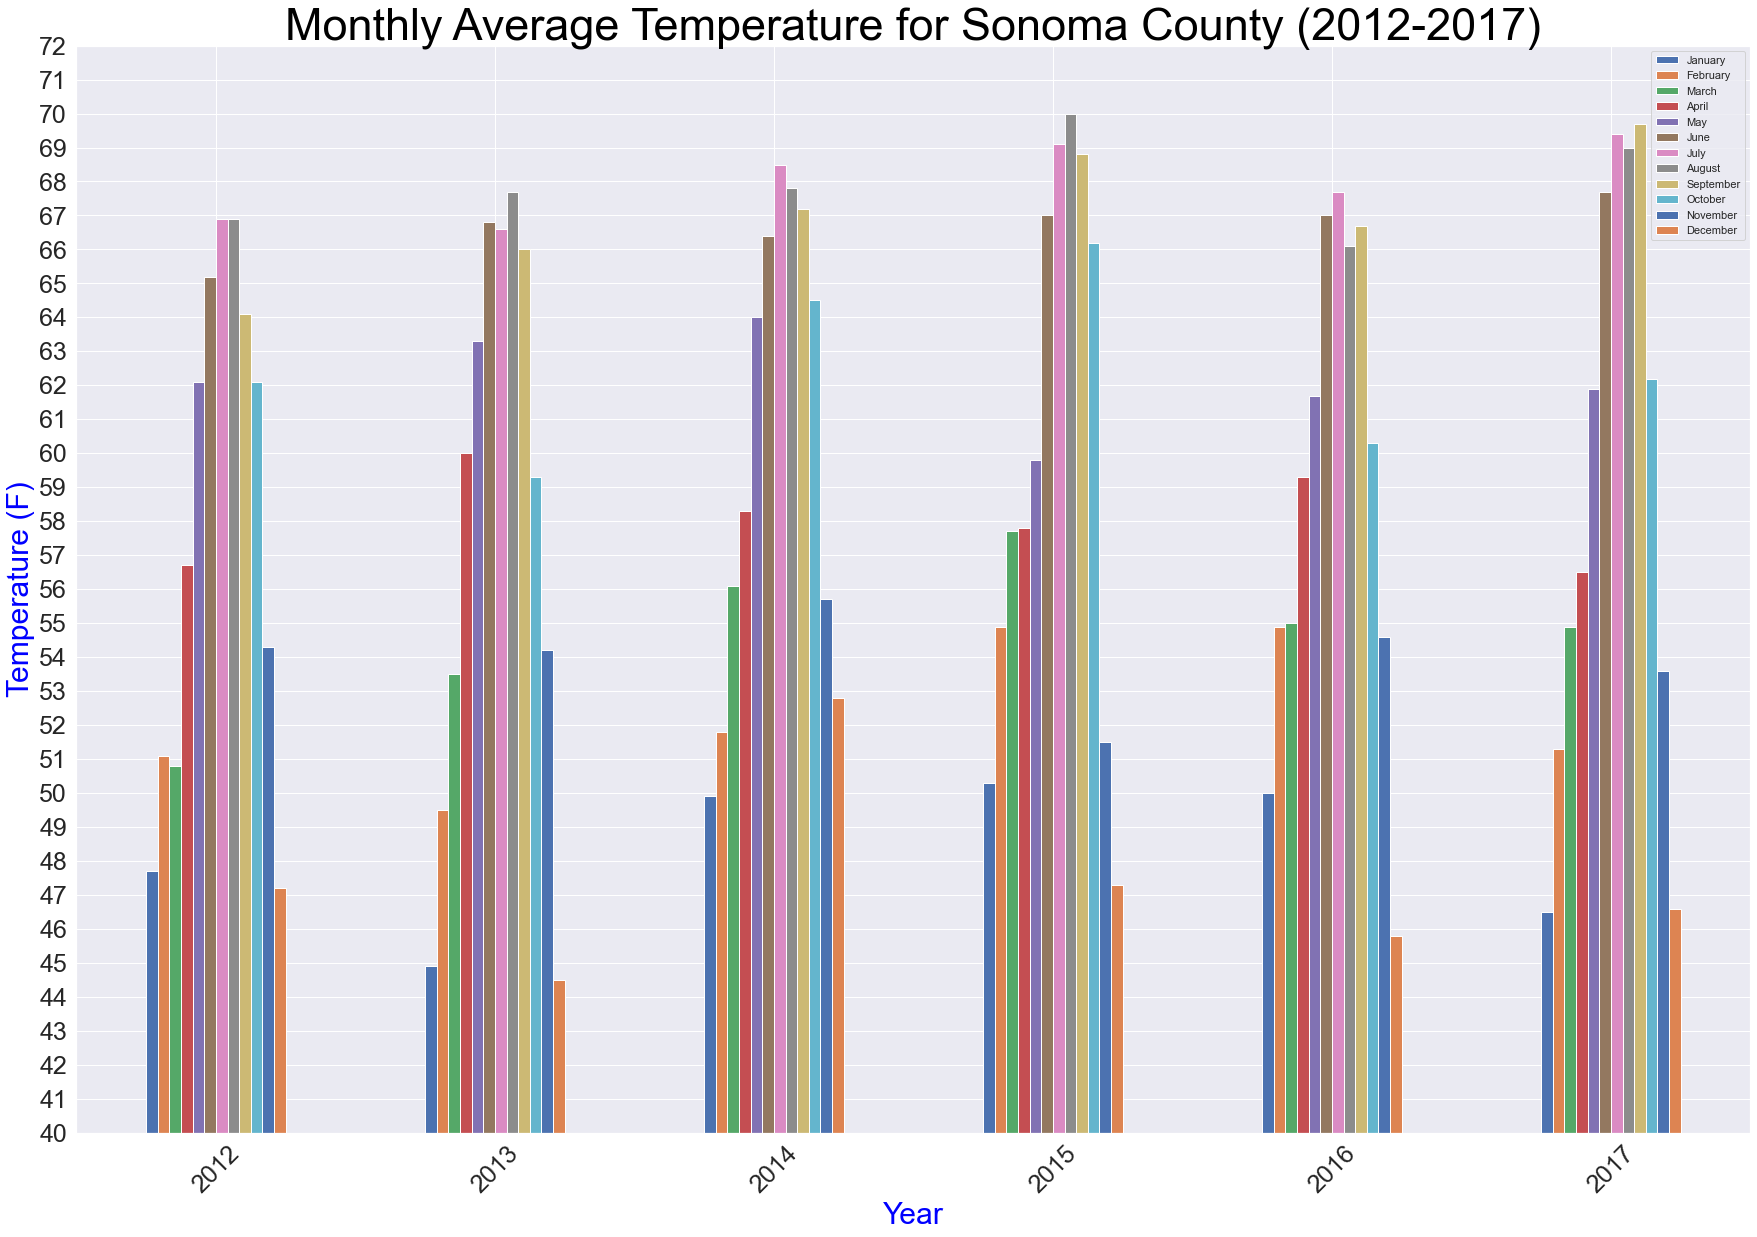

In [15]:
#Bar graph of the six years of interest (2012 to 2017)
#The warmest months tend to be in the summer (June, July and August) which is expected.  Average summer temperatures tended to be slightly higher in 2016 by a few degrees

#identify and plot the data of interest
new_temp_some_rows.plot(x="YEAR", fontsize=25, y=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December" ], kind="bar", figsize=(30, 20))

#set the title/ xlable/ ylable text, font size and font color
plt.title("Monthly Average Temperature for Sonoma County (2012-2017)", fontsize=45, color='black')
plt.xlabel('Year', fontsize=30, color='blue')
plt.ylabel('Temperature (F)', fontsize=30, color='blue')

#adjust the values that show up on the y axis, originally they were every 10f and it was hard interpret the bars 
plt.locator_params(axis="y", nbins=60)

#adjust the values displayed on the y axis, (there's no point to display temps 0-40 because there weren't temps that low in the data)
plt.ylim(40, 72)

#rotate the X labels so they're easier to read
plt.xticks(rotation=45)

In [16]:
#transformed all temp data for scatter plots
import pandas as pd
scattertemp = pd.read_csv(r'C:\Users\efann\Desktop\Wildfire\SonomaCountyHistoricAvTemp4scatter.csv')

In [20]:
#If there is an "M" in the temp column, that row will be excluded
scattertemp = scattertemp[scattertemp.Temp != "M"]

#If there is a "1998" or a "2022" in the Year column, those rows will be excluded (those years don't have full datasets)
#NOTE: there are no quotes here, meaning the value is treated as a number.  Quotes treat the value as a string.
scattertemp = scattertemp[scattertemp.Year != 2022]
scattertemp = scattertemp[scattertemp.Year != 1998]

In [22]:
#Inspect the data; there are no M values and no 1998 or 2002 rows (years with incomplete data)
print(scattertemp)

     Year      Month  Temp
13   1999    January  45.5
14   1999   February  47.1
15   1999      March  48.7
16   1999      April  55.2
17   1999        May  58.7
..    ...        ...   ...
307  2021  September  66.7
308  2021    October  59.4
309  2021   November  54.6
310  2021   December  46.5
311  2021     AvTemp    58

[299 rows x 3 columns]


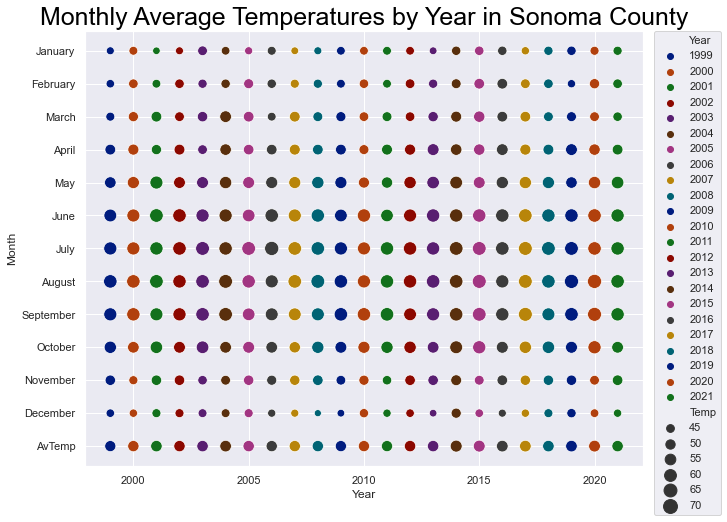

In [23]:
#Scatterplot to assess average temp by month over years.
#Higher temps in the summer as observed in earlier assessments, no obvious temp differences across months

# Change plot size
fig = plt.gcf()
fig.set_size_inches(10, 8)

#Create a data frame w the data
df = pd.DataFrame(scattertemp)

#convert temp data as float type so they can be identified as numbers with decimals
df.Temp = df.Temp.astype(float)

#telling the plot what data to use and how to graph it
#NOTE: changing the "sizes" with a larger number in front puts the temp values in decending order (higher temps have smaller markers)
#NOTE: legend=full (or =auto if python uses the full version) gives ALL point values; made legend too long/ not as effective
t = sns.scatterplot(
    data=scattertemp, x="Year", y="Month", hue="Year", size="Temp",
    sizes=(50,200), legend="brief", hue_norm=(40,75), palette='dark'
)
#function to add a title with information about what the title says, font size and the title color
plt.title("Monthly Average Temperatures by Year in Sonoma County", fontsize=25, color='black')

#function to add a legend with anchoring outside of the plot area, legend doesn't cover data
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

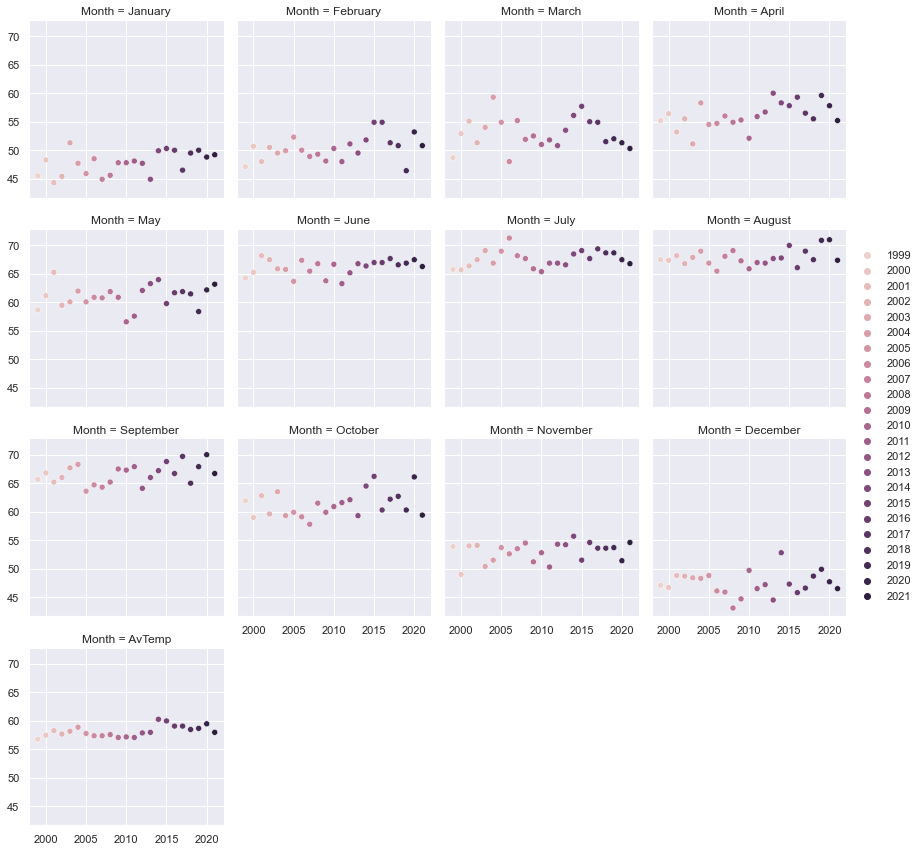

In [25]:
#Another, more detailed way of assesing the average monthly temps.  Now we don't have to group temp data to make the plots effective.
#September and October had higher average temps in 2017, but other years were even warmer for those same months
#Shows the year to year average variations across time for each month- some months have been fairly stable in more recent years while others have more variation year to year
#Average Yearly temp comparison suggests that overall the average temp has gone up a few degrees, with the highest average temp occuring in 2014.

temps = scattertemp

#Create a data frame w the data
df = pd.DataFrame(temps)

# convert temp data as float type so they can be identified as numbers with decimals
df.Temp = df.Temp.astype(float)

# sort values 
df.sort_values('Temp', ascending=True, inplace=True)

#Plot the multiple scatterplots, 4 per column, define the data to use and add a legend
g = sns.FacetGrid(temps, col="Month", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="Year", y="Temp", hue="Year", legend="full")
g.add_legend()



In [26]:
#import for linear regression to investigate correlations between higher temps and larger fires
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure

In [27]:
linrig = pd.read_csv(r'C:\Users\efann\Desktop\Wildfire\SCLinRegression.csv', usecols = ['FIRE_YEAR','MONTH','DISCOVERY_DATE','AVERAGE_MONTH_TEMP','FIRE_SIZE'])
linrig.dtypes

FIRE_YEAR               int64
MONTH                  object
DISCOVERY_DATE         object
AVERAGE_MONTH_TEMP    float64
FIRE_SIZE             float64
dtype: object

In [28]:
dflinrig = pd.DataFrame(linrig)

In [30]:
dflinrig.MONTH = dflinrig.MONTH.astype(str)
#dflinrig.DISCOVERY_DATE = dflinrig.MONTH.astype(str)

dflinrig.dtypes

FIRE_YEAR               int64
MONTH                  object
DISCOVERY_DATE         object
AVERAGE_MONTH_TEMP    float64
FIRE_SIZE             float64
dtype: object

In [32]:
#prep data and assess
X = dflinrig.iloc[:, 3].values.reshape(-1, 1) # AVERAGE_MONTH_TEMP(attribute; independant variable; X) and fire size(label; dependant variable,Y)
Y = dflinrig.iloc[:, 4].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create an object for the class
linear_regressor.fit(X, Y)  # perform linear regression function
Y_pred = linear_regressor.predict(X)  # make prediction

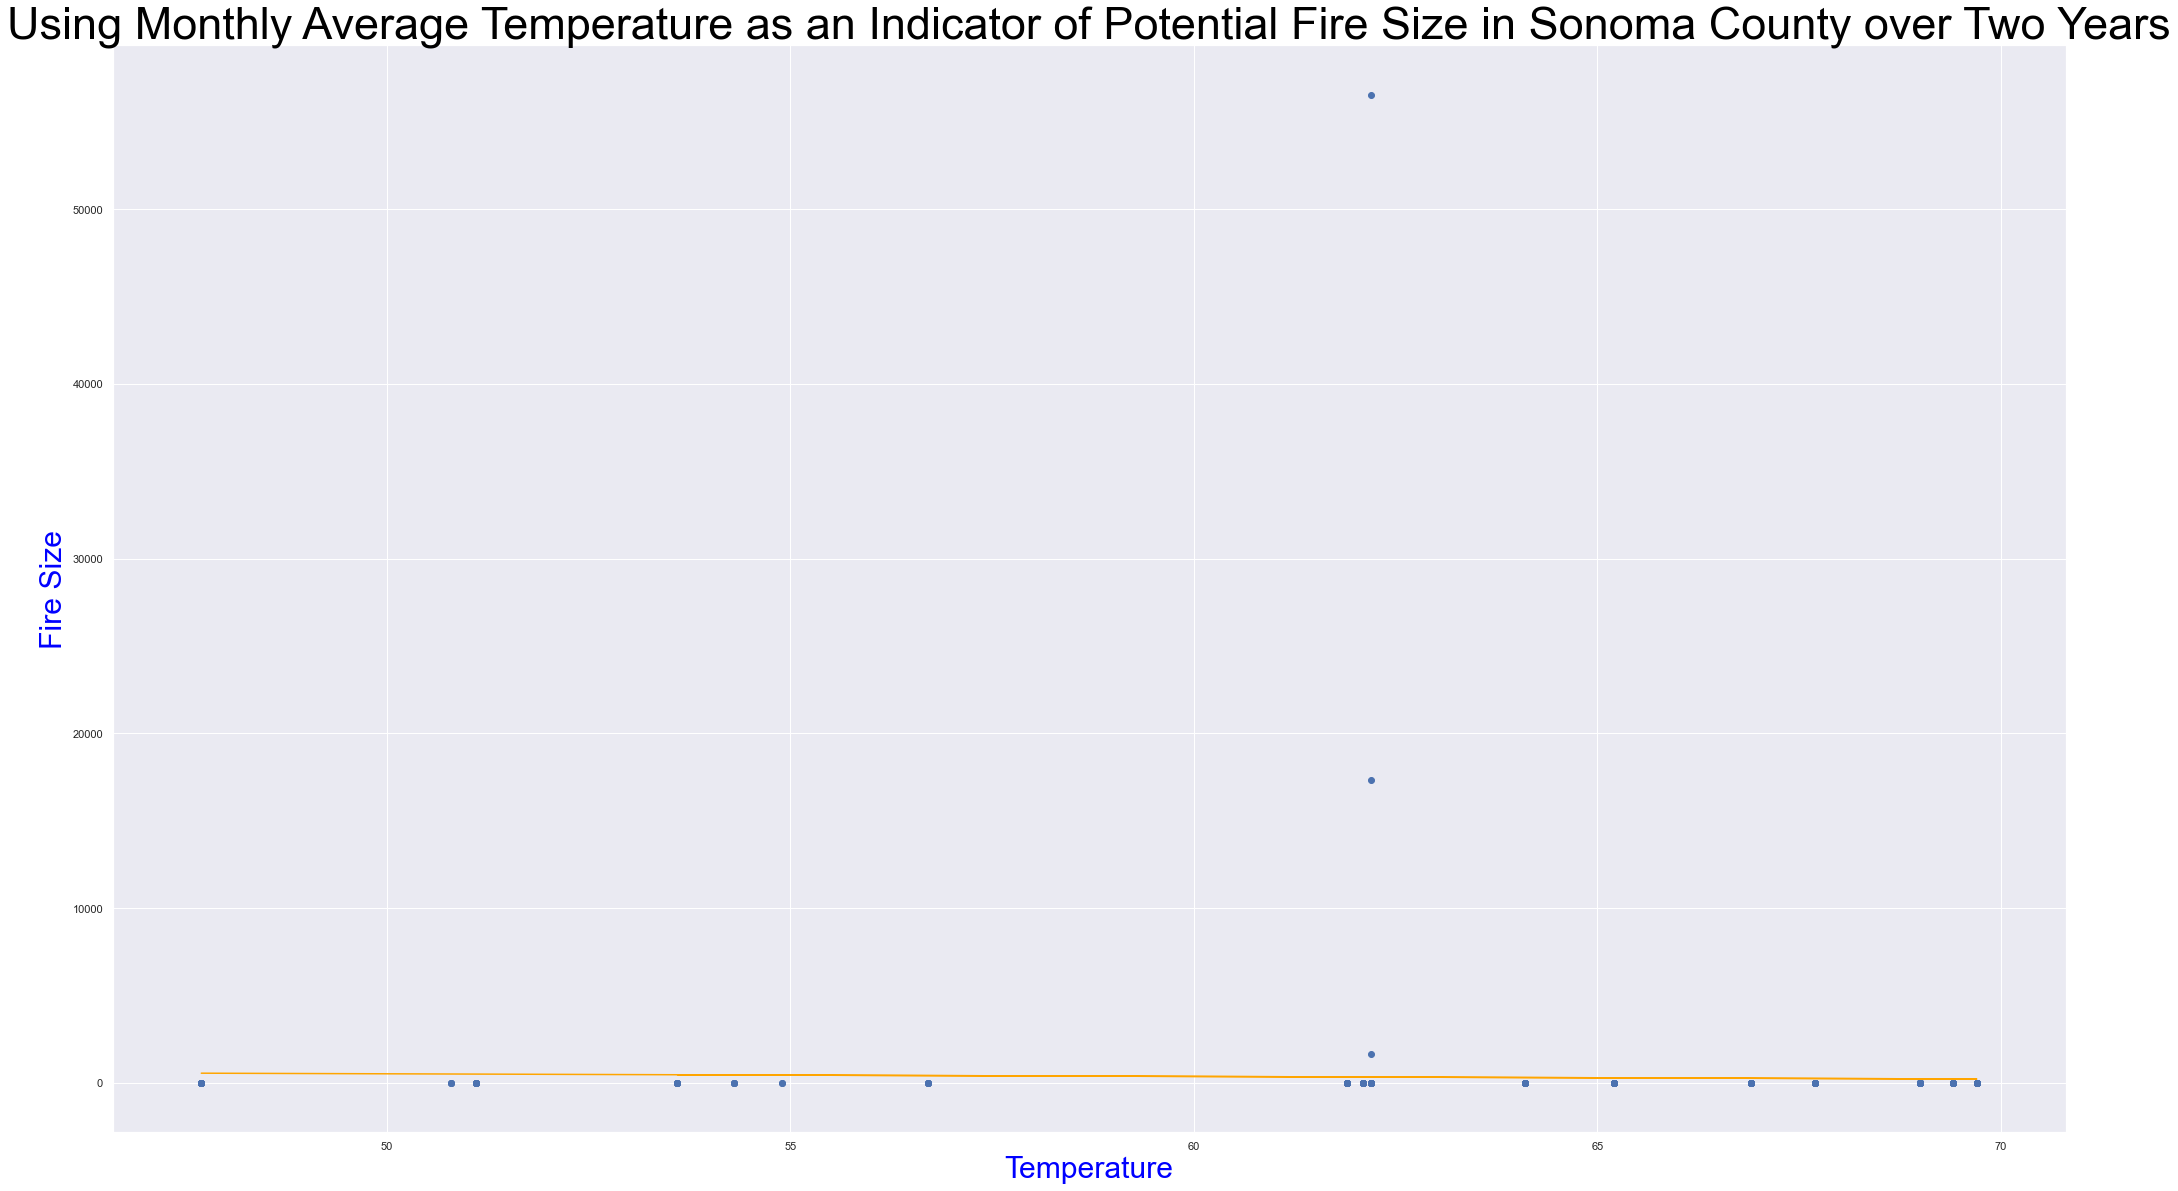

<Figure size 10000x5000 with 0 Axes>

In [34]:
#format the look of the visualization
plt.title("Using Monthly Average Temperature as an Indicator of Potential Fire Size in Sonoma County over Two Years", fontsize=45, color='black')
plt.xlabel('Temperature', fontsize=30, color='blue')
plt.ylabel('Fire Size', fontsize=30, color='blue')

#visualize the data
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='orange')
plt.figure(figsize=(200,100), dpi= 50)
plt.show()

#We don't see a strong correlation here.  This may be due to limited data or other indepentant 
#variables that may impact fire size, but we can investigate further with the data we have.

Text(243.35500000000005, 0.5, 'Fire Size')

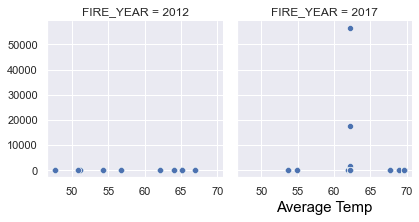

In [35]:
#scatterplot of the two years separately to get a visual; one year had some really big fires
lr = sns.FacetGrid(linrig, col="FIRE_YEAR", col_wrap=2)
lr.map_dataframe(sns.scatterplot, x="AVERAGE_MONTH_TEMP", y="FIRE_SIZE", legend="full")
#lr.add_legend()
plt.xlabel('Average Temp', fontsize=15, color='black')
plt.ylabel('Fire Size', fontsize=10, color='black')

In [36]:
#Look at just 2012 dates (remove 2017)
lr12 = dflinrig.drop(dflinrig.index[dflinrig['FIRE_YEAR'] == 2017])

In [37]:
#Check to make sure we only have 2012 data
print(lr12)

     FIRE_YEAR     MONTH   DISCOVERY_DATE  AVERAGE_MONTH_TEMP  FIRE_SIZE
0         2012   January    1/6/2012 0:00                47.7       0.01
1         2012   January    1/8/2012 0:00                47.7       0.06
2         2012   January   1/11/2012 0:00                47.7       0.01
3         2012   January   1/14/2012 0:00                47.7       0.10
4         2012   January   1/15/2012 0:00                47.7       0.01
..         ...       ...              ...                 ...        ...
108       2012   October  10/21/2012 0:00                62.1       0.10
109       2012  November  11/10/2012 0:00                54.3       0.50
110       2012  November  11/11/2012 0:00                54.3       1.00
111       2012  November  11/13/2012 0:00                54.3       0.10
112       2012  November  11/24/2012 0:00                54.3       0.10

[113 rows x 5 columns]


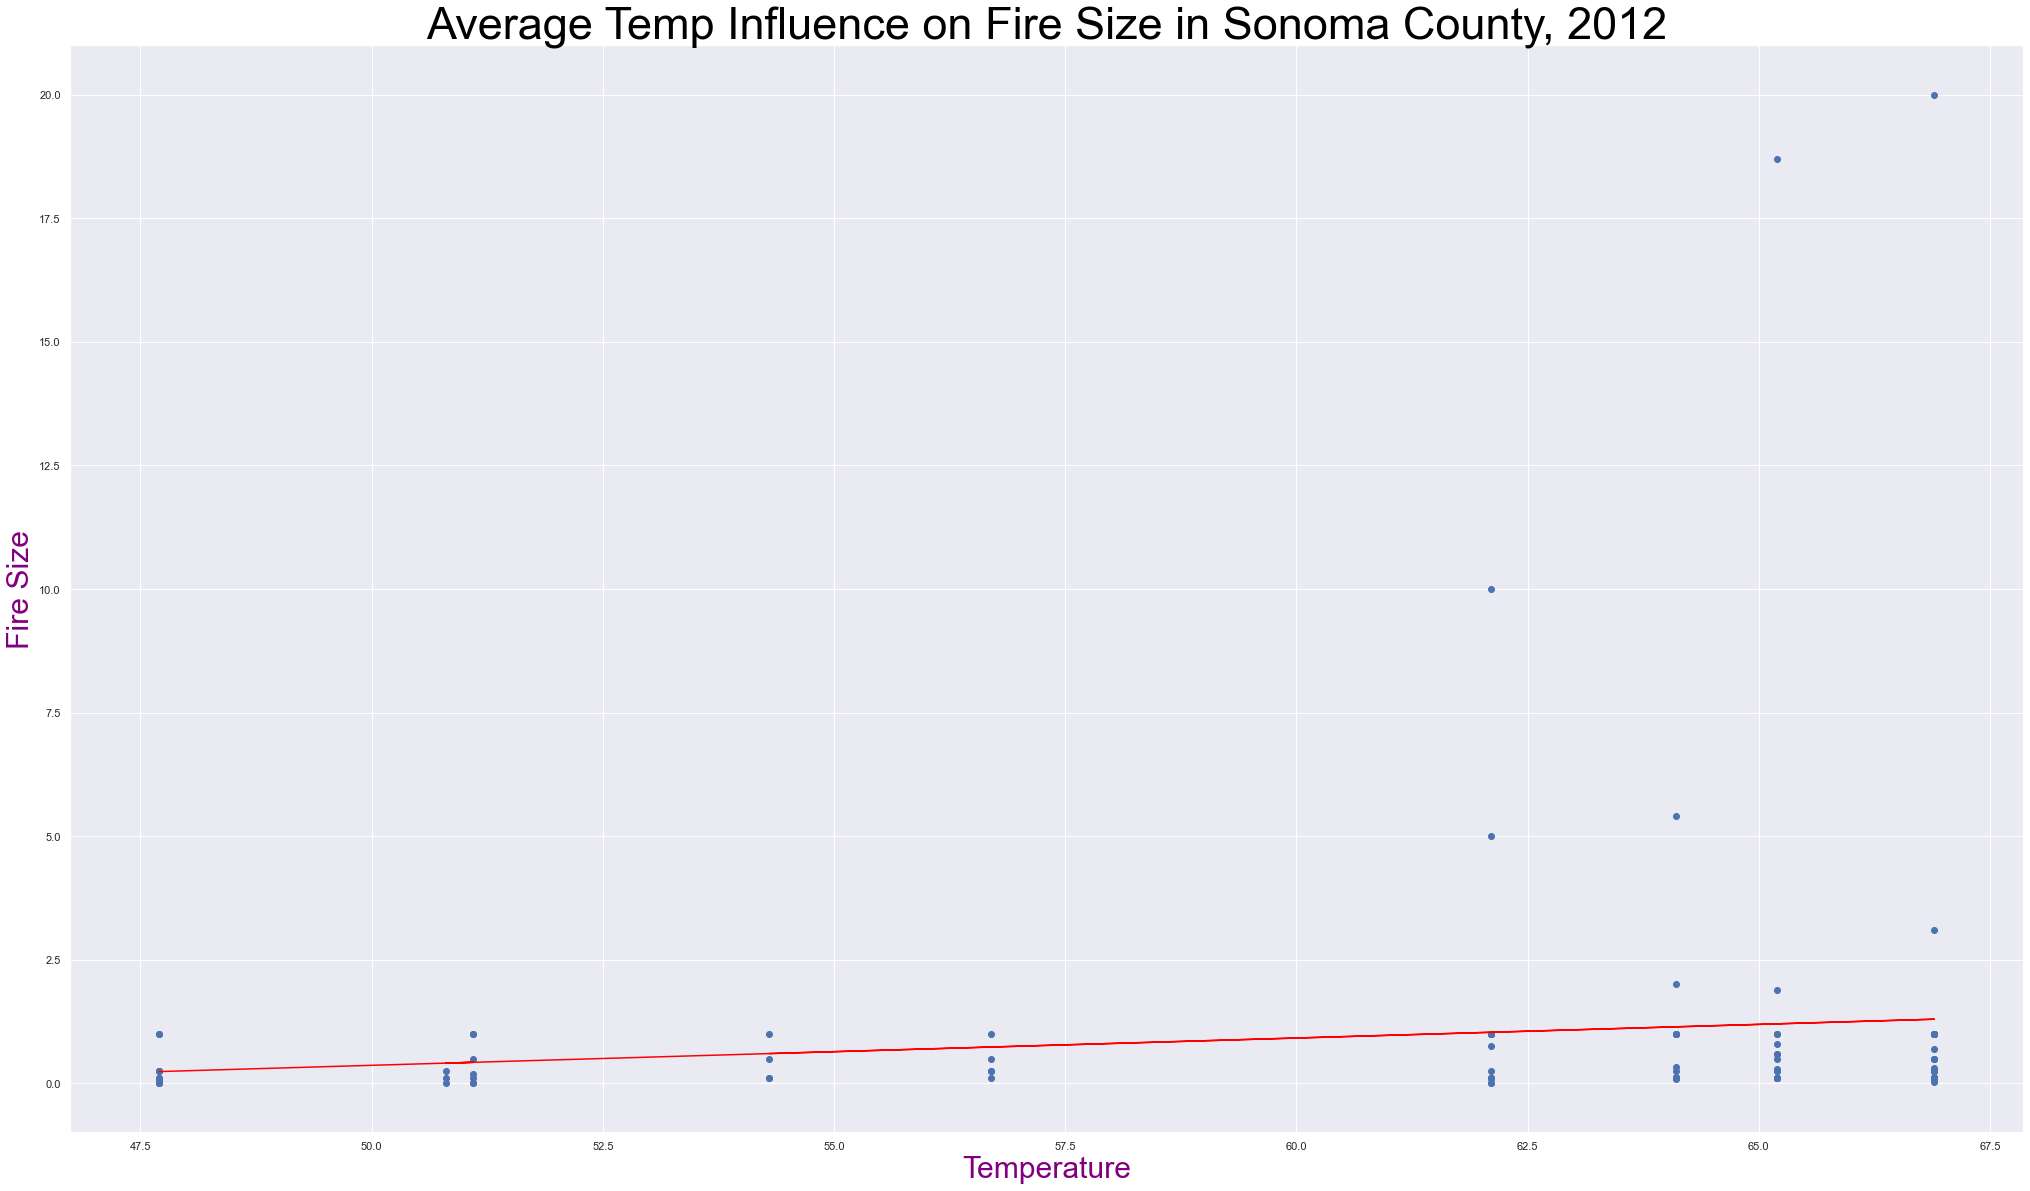

<Figure size 10000x5000 with 0 Axes>

In [41]:
X3 = lr12.iloc[:, 3].values.reshape(-1, 1) #Identify X and Y variables
Y3 = lr12.iloc[:, 4].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  # create object
linear_regressor.fit(X3, Y3)  # perform linear regression
Y3_pred = linear_regressor.predict(X3)  # predict
plt.title("Average Temp Influence on Fire Size in Sonoma County, 2012", fontsize=45, color='black')
plt.xlabel('Temperature', fontsize=30, color='purple')
plt.ylabel('Fire Size', fontsize=30, color='purple')
plt.scatter(X3, Y3)
plt.plot(X3, Y3_pred, color='red')
plt.figure(figsize=(200,100), dpi= 50)
plt.show()

#There is a slight positive correlation here, with the larger 2012 fires happening in warmer months.

In [42]:
#Look at just 2017 dates (remove 2012)
lr17 = dflinrig.drop(dflinrig.index[dflinrig['FIRE_YEAR'] == 2012])

In [43]:
print(lr17)

     FIRE_YEAR     MONTH   DISCOVERY_DATE  AVERAGE_MONTH_TEMP  FIRE_SIZE
113       2017     March   3/11/2017 0:00                54.9       0.10
114       2017     March   3/18/2017 0:00                54.9       0.01
115       2017       May    5/6/2017 0:00                61.9       0.01
116       2017       May   5/12/2017 0:00                61.9       0.01
117       2017       May   5/13/2017 0:00                61.9       0.01
..         ...       ...              ...                 ...        ...
241       2017  November   11/5/2017 0:00                53.6       0.01
242       2017  November   11/6/2017 0:00                53.6       0.01
243       2017  November   11/6/2017 0:00                53.6       0.10
244       2017  November  11/14/2017 0:00                53.6       0.01
245       2017  November  11/22/2017 0:00                53.6       0.10

[133 rows x 5 columns]


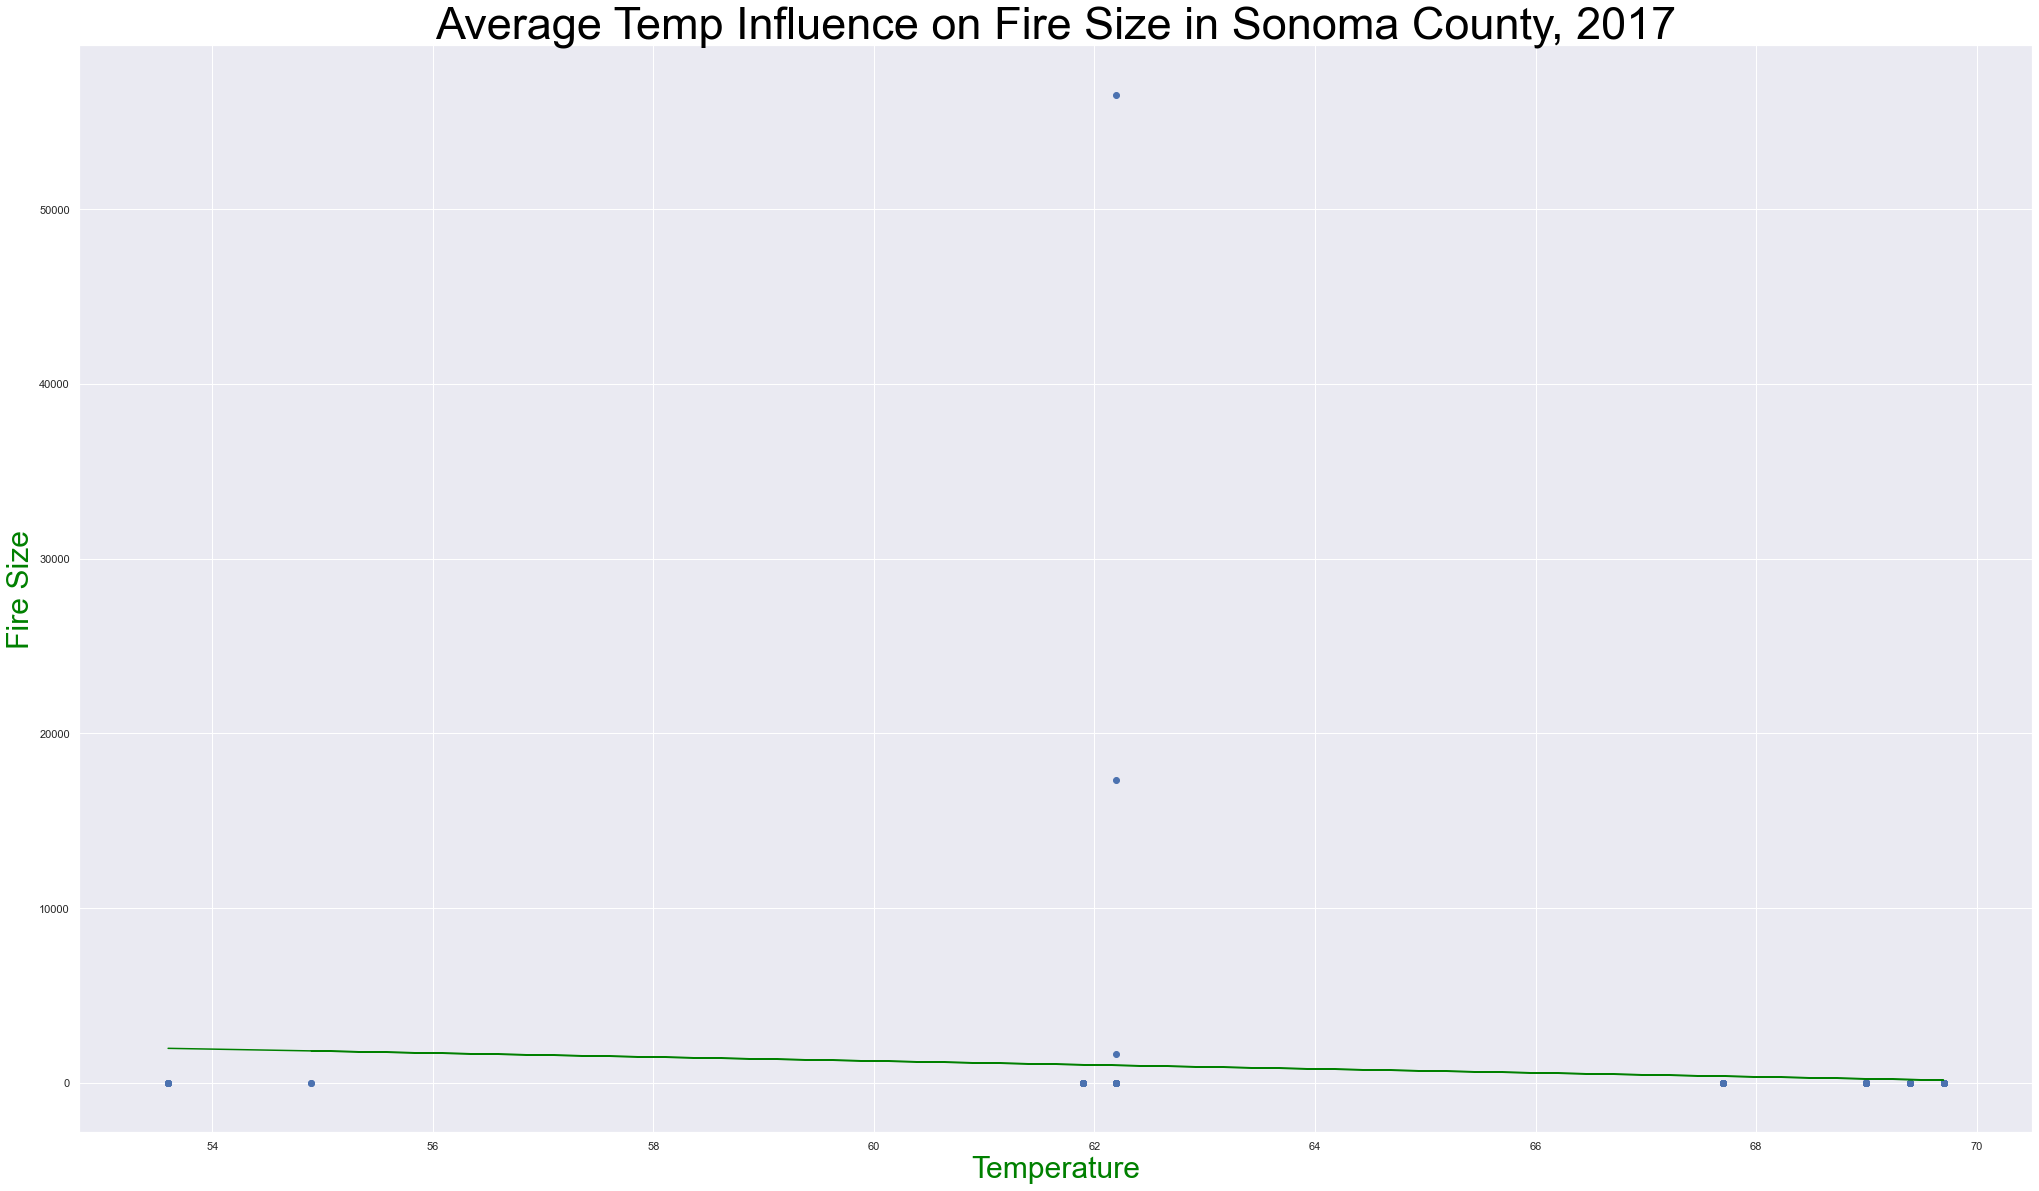

<Figure size 10000x5000 with 0 Axes>

In [44]:
X4 = lr17.iloc[:, 3].values.reshape(-1, 1) # identify X and Y variables
Y4 = lr17.iloc[:, 4].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X4, Y4)
Y4_pred = linear_regressor.predict(X4)
plt.title("Average Temp Influence on Fire Size in Sonoma County, 2017", fontsize=45, color='black')
plt.xlabel('Temperature', fontsize=30, color='green')
plt.ylabel('Fire Size', fontsize=30, color='green')
plt.scatter(X4, Y4)
plt.plot(X4, Y4_pred, color='green')
plt.figure(figsize=(200,100), dpi= 50)
plt.show()

#Slight negative correlation here, though the fires this year were much bigger. It's possible that
#2017 was a "outlier" fire year, though more years of fire data would be needed to support that.
#Further investigative measures assess could include fire size in relation to other independant 
#variables such as cause of fire, average wind duriing the fire lif and so forth.